In [22]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import bened as ben

# GAMMA XDVR

## CARICAMENTO DATI DA FILE E DIVISIONE CANALI

In [4]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [25]:
energy_americio = np.asarray(americio['Data_R;3']['Energy'].array(), dtype=np.float64)
canaliAM = np.asarray(americio['Data_R;3']['Channel'].array(), dtype=np.int64)

energy_sodio = np.asarray(sodio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliNA = np.asarray(sodio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_europio = np.asarray(europio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliEU = np.asarray(europio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_autunite = np.asarray(autunite['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliAUT = np.asarray(autunite['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_enea = np.asarray(enea['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliENEA = np.asarray(enea['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_porcini = np.asarray(porcini['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPORCINI = np.asarray(porcini['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_cement = np.asarray(cement['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliCEMENTO = np.asarray(cement['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_potassio = np.asarray(potassio['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPOTASSIO = np.asarray(potassio['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_zirconio = np.asarray(zirconio['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliZIRCONIO = np.asarray(zirconio['Data_R;5']['Channel'].array(), dtype=np.int64)

fondo2giorno = np.asarray(back2['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliback2 = np.asarray(back2['Data_R;4']['Channel'].array(), dtype=np.int64)

fondo3giorno = np.asarray(back3['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliback3 = np.asarray(back3['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_exposed = np.asarray(exposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliexp = np.asarray(exposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_unexposed = np.asarray(unexposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliunexp = np.asarray(unexposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_calibrated = np.asarray(calibrated['Data_R;9']['Energy'].array(), dtype=np.float64)
canalical = np.asarray(calibrated['Data_R;9']['Channel'].array(), dtype=np.int64)

In [26]:
# Separa i dati in due array distinti per ogni canale (0 e 1)
americio_ch0 = energy_americio[canaliAM == 0]
americio_ch1 = energy_americio[canaliAM == 1]

sodio_ch0 = energy_sodio[canaliNA == 0]
sodio_ch1 = energy_sodio[canaliNA == 1]

europio_ch0 = energy_europio[canaliEU == 0]
europio_ch1 = energy_europio[canaliEU == 1]

autunite_ch0 = energy_autunite[canaliAUT == 0]
autunite_ch1 = energy_autunite[canaliAUT == 1]

enea_ch0 = energy_enea[canaliENEA == 0]
enea_ch1 = energy_enea[canaliENEA == 1]

porcini_ch0 = energy_porcini[canaliPORCINI == 0]
porcini_ch1 = energy_porcini[canaliPORCINI == 1]

cemento_ch0 = energy_cement[canaliCEMENTO == 0]
cemento_ch1 = energy_cement[canaliCEMENTO == 1]

potassio_ch0 = energy_potassio[canaliPOTASSIO == 0]
potassio_ch1 = energy_potassio[canaliPOTASSIO == 1]

zirconio_ch0 = energy_zirconio[canaliZIRCONIO == 0]
zirconio_ch1 = energy_zirconio[canaliZIRCONIO == 1]

fondo2_ch0 = fondo2giorno[canaliback2 == 0]
fondo2_ch1 = fondo2giorno[canaliback2 == 1]

fondo3_ch0 = fondo3giorno[canaliback3 == 0]
fondo3_ch1 = fondo3giorno[canaliback3 == 1]

exposed_ch0 = energy_exposed[canaliexp == 0]
exposed_ch1 = energy_exposed[canaliexp == 1]

unexposed_ch0 = energy_unexposed[canaliunexp == 0]
unexposed_ch1 = energy_unexposed[canaliunexp == 1]

calibrated_ch0 = energy_calibrated[canalical == 0]
calibrated_ch1 = energy_calibrated[canalical == 1]

## ENERGY CALIBRATION

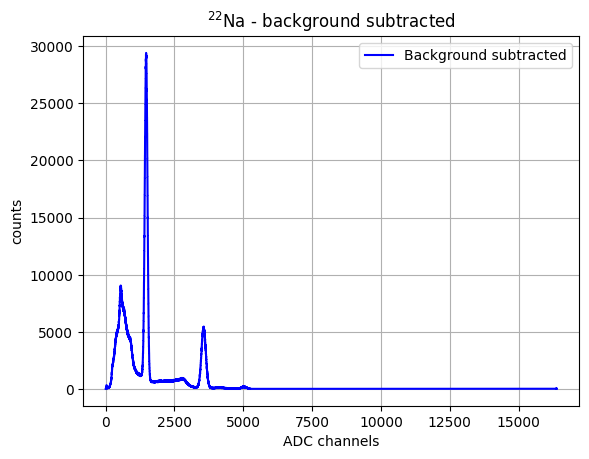

In [ ]:
bin_sodio_ch0_corr, hist_sodio_ch0_corr = ben.background(sodio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch0_peak1 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600, n=2)
sodioch0_peak2 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)

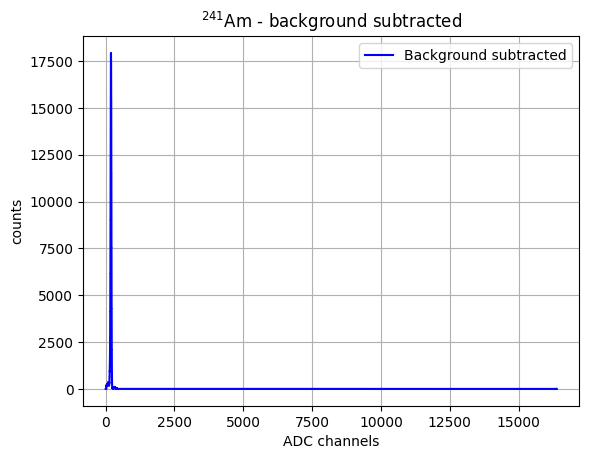

In [ ]:
bin_americio_ch0_corr, hist_americio_ch0_corr = ben.background(americio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=250, x1=150, x2=250, n=2)

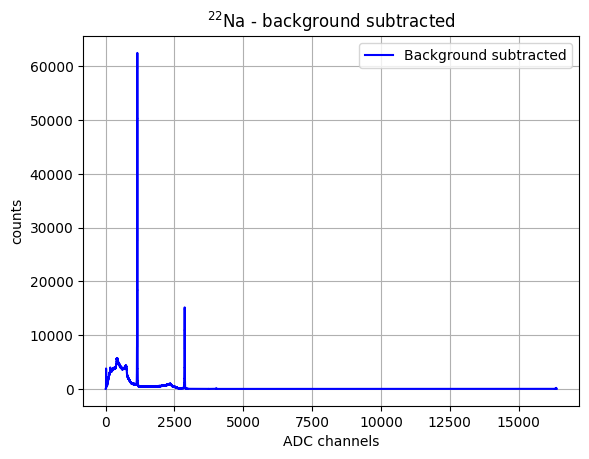

In [ ]:
bin_sodio_ch1_corr, hist_sodio_ch1_corr = ben.background(sodio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch1_peak1 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1125, xmax=1175, x1=1050, x2=1250, n=2)
sodioch1_peak2 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=2862, xmax=2885, x1=2800, x2=2920, n=2)

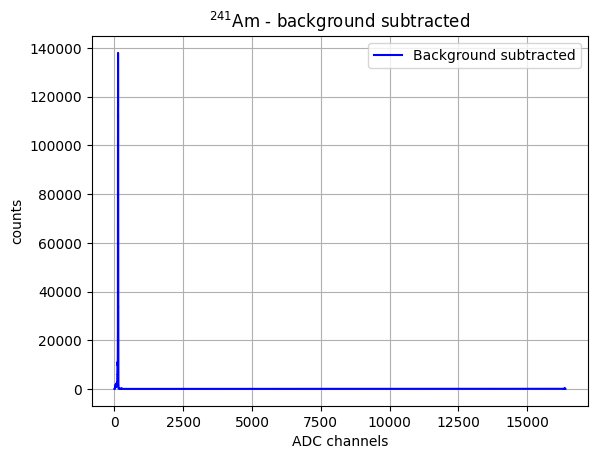

In [ ]:
bin_americio_ch1_corr, hist_americio_ch1_corr = ben.background(americio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch1_corr, counts=hist_americio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=120, xmax=150, x1=50, x2=250, n=2)

cella di calibrazione

In [19]:
known_energies=np.array([511, 1274.54, 59.54])

ADC_ch0 = np.array([1469.822779, 3559.824076, 193.5960538])
sigma_ADC_ch0 = np.array([0.06195962621, 0.126559622, 0.03210712039])

ADC_ch1 = np.array([1150.119059, 2870.587831, 133.2296128])
sigma_ADC_ch1 = np.array([0.04778742868, 0.02835126844, 0.062850221])

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.787748871905823 ± 9.272353716430083e-05
Intercetta (q) = 30.164697724655948 ± 0.033904825989367116
Chi-squared $\chi^2$ = 100148.60939431532
Reduced chi-squared $\chi^2_r$ = 100148.60939431532


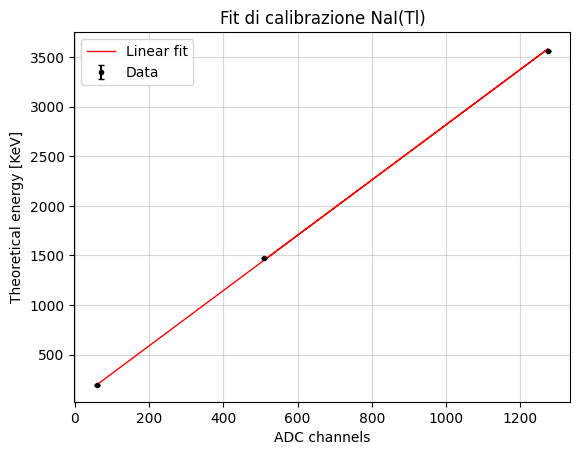

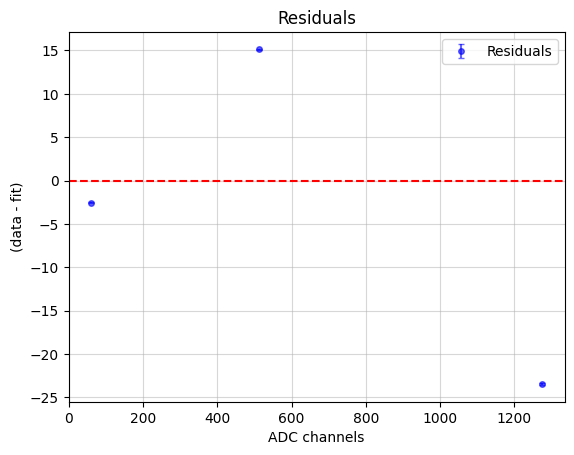

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.2530771062676838 ± 4.9024808386514985e-05
Intercetta (q) = -1.066907721405115 ± 0.051509372214858525
Chi-squared $\chi^2$ = 14.115649484356908
Reduced chi-squared $\chi^2_r$ = 14.115649484356908


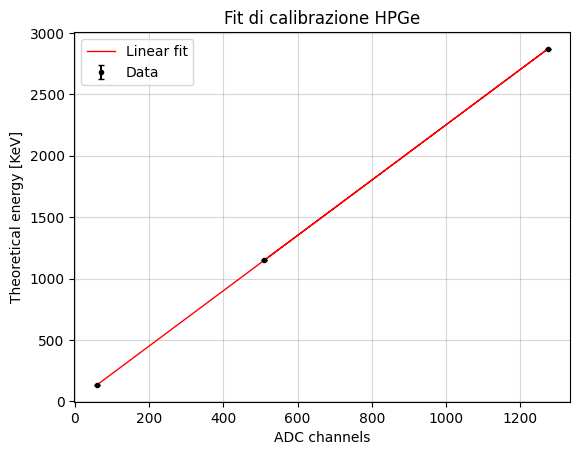

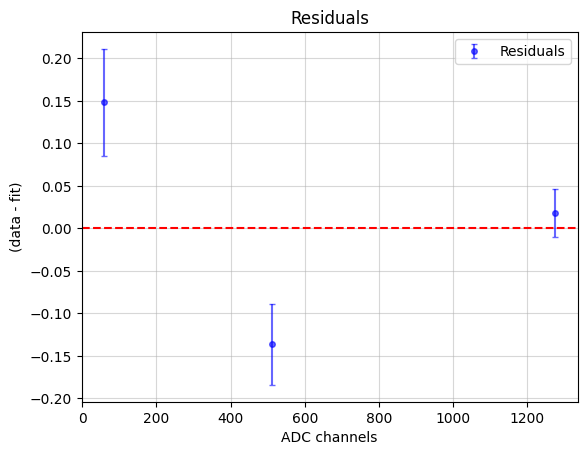

In [28]:
calibrazione_ch0 = ben.linear_regression(x=known_energies, y=ADC_ch0, sy=sigma_ADC_ch0, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Fit di calibrazione NaI(Tl)')
calibrazione_ch1 = ben.linear_regression(x=known_energies, y=ADC_ch1, sy=sigma_ADC_ch1, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Fit di calibrazione HPGe')

## efficienza HPGe

In [21]:
europio20min = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())

C:\Users\anton\AppData\Local\Temp\ipykernel_10544\3061995950.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())


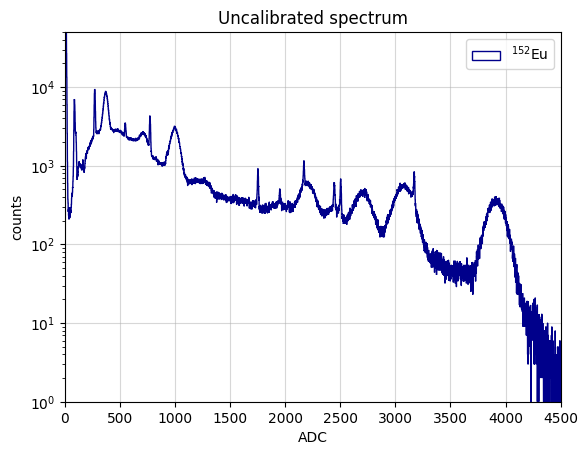

In [22]:
plt.hist(energy_europio20min, bins=energy_europio20min.max(), edgecolor='darkblue', histtype='step', lw=1, label="$^{152}$Eu")
plt.title('Uncalibrated spectrum')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()

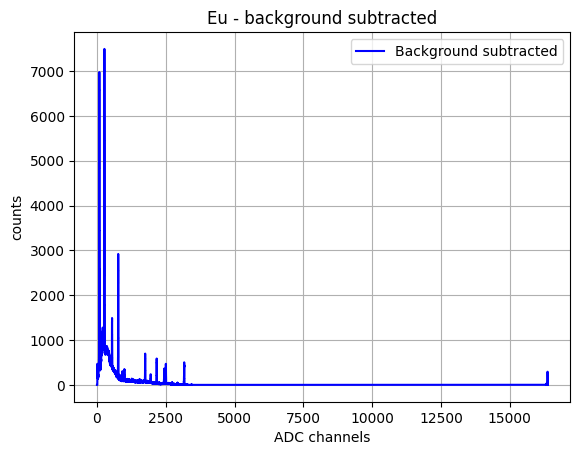

In [23]:
bin_europio_ch1_corr, hist_europio_ch1_corr = ben.background(europio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', 'Eu - background subtracted')

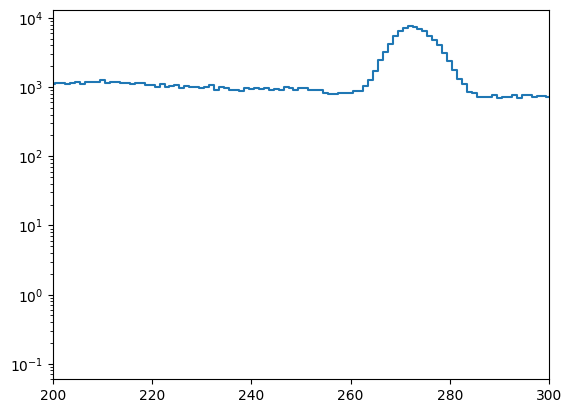

In [24]:
plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr)
plt.xlim(200, 300)
plt.yscale('log')
plt.show()




-----------------------------------------------
Peak 1
Ampiezza = 78832.74434865534 ± 1289.6605451767591
Media = 89.38608171679617 ± 0.0791130177341661
Sigma = 4.53087774468045 ± 0.09369528107638402
Chi-quadro = 111.93951494289632
Chi-quadro ridotto = 9.328292911908028
Integrale dell'istogramma nel range [80.32432622743526, 98.44783720615708] = 77852.81620204796
-----------------------------------------------
Peak 2
Ampiezza = 85073.65338061415 ± 1215.8176716056284
Media = 273.2130881783164 ± 0.06856549364035815
Sigma = 4.570491553309549 ± 0.0835870120859904
Chi-quadro = 104.02428825879782
Chi-quadro ridotto = 8.668690688233152
Integrale dell'istogramma nel range [264.0721050716973, 282.3540712849355] = 81613.7367078755
-----------------------------------------------


(0.0, 500.0)

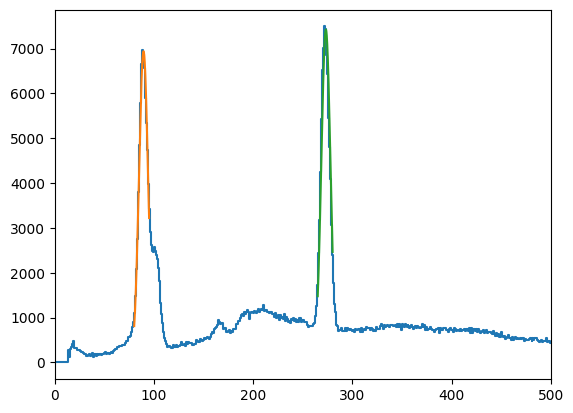

In [25]:
print(f'-----------------------------------------------')
print(f'Peak 1')
europioch1_peak1 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of Eu', xmin=80, xmax=95, n=2)
print(f'Peak 2')
europioch1_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of Eu', xmin=265, xmax=280, n=2)

parametri_peak1= europioch1_peak1[0]
errori_peak1 = europioch1_peak1[1]

plot_peak1 = europioch1_peak1[5]
plot_peak2 = europioch1_peak2[5]

plt.step(plot_peak1[0], plot_peak1[1])
plt.plot(plot_peak1[2], plot_peak1[3])
plt.plot(plot_peak2[2], plot_peak2[3])

plt.xlim(0,500)
# plt.yscale('log')